#### <p style="width: 800px; border-radius: 12px; border: 3px dashed grey; padding: 20px; background-color: pink; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: maroon; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;"> Multiple Linear Regression | Problem Solving 🔴 ✅</p>

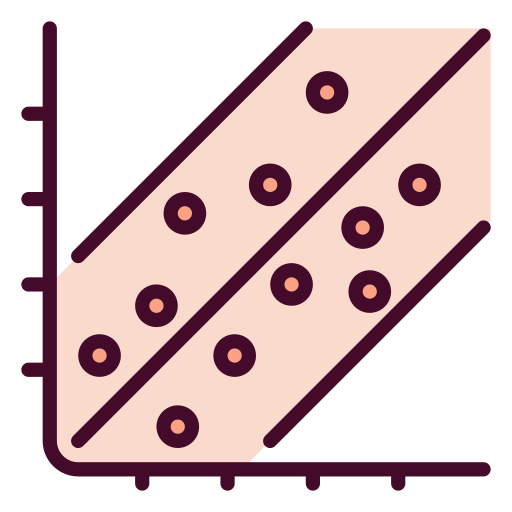

### <div style="text-align:center; border-radius:15px 15px; padding:8px; color:black; margin:0; font-size:100%; font-family:Pacifico; background-color:pink; overflow:hidden"><b> 🔴 The Problem  </b></div>

Use multiple linear regression analysis to solve the problem of the extent to which the proportion of individuals using the Internet - out of the total population - in Algeria is related to indicators such as:

* Total population?
* Fixed-line subscriptions?
* Mobile phone subscriptions?
* GDP per capita?

### <div style="text-align:center; border-radius:15px 15px; padding:8px; color:blue; margin:0; font-size:100%; font-family:Pacifico; background-color:yellow; overflow:hidden"><b> 📝 Work plan    </b></div>

- [1 | Follow Data](#1)
 
- [2 | Visualize Data](#2)
   
- [3 | Multiple Linear Regression Analysis](#3)
   > - [Step 1 - Model](#3.1)
   > - [Step 2 - Cost Function](#3.2)
   > - [Step 3 - Optimizer](#3.3)
   > - [Step 4 - Evaluation](#3.4)

<a id='1'></a>
# <p style="width: 800px; border-radius: 12px; border: 3px dashed white; padding: 20px; background-color:#20b2aa; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: white; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;"> 🔎 Follow Data</p>


Firstly, let's import the necessary libraries: `numpy` | `pandas` | `plotly` | `matplotlib` | `seaborn` | `scipy`

In [1]:
# Importing necessary libraries
import numpy as np 
import pandas as pd 
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
matplotlib.style.use('ggplot')
%matplotlib inline

# import warnings
import warnings
warnings.filterwarnings("ignore")

# Style
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# File
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/algeria-five-indicators/Four_Indicators.csv
/kaggle/input/algeria-five-indicators/Users_Internet.csv


We will need only this file: `algeria-five-indicators/Four_Indicators.csv`

In [2]:
# Reading the Dataset
df = pd.read_csv("/kaggle/input/algeria-five-indicators/Four_Indicators.csv")
df.head()

,Year,Users_Percentage,Total_population,Fixed_telephone_subscriptions,Mobile_phone_subscriptions,GDP_per_capita_current_US_Dollar,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,1990,0.000000,25518074,812000,470,2431.551360,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991,0.000000,26133905,883120,4781,1749.286087,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992,0.000000,26748303,962247,4781,1794.623507,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993,0.000000,27354327,1068094,4781,1825.875097,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1994,0.000361,27937006,1122409,1348,1522.825203,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Clean data
df.dropna(how='all', axis=1, inplace=True)
df.head()

,Year,Users_Percentage,Total_population,Fixed_telephone_subscriptions,Mobile_phone_subscriptions,GDP_per_capita_current_US_Dollar
0,1990,0.000000,25518074,812000,470,2431.551360
1,1991,0.000000,26133905,883120,4781,1749.286087
2,1992,0.000000,26748303,962247,4781,1794.623507
3,1993,0.000000,27354327,1068094,4781,1825.875097
4,1994,0.000361,27937006,1122409,1348,1522.825203


In [4]:
# Make Index = Year
df.set_index('Year', inplace=True)
df

,Users_Percentage,Total_population,Fixed_telephone_subscriptions,Mobile_phone_subscriptions,GDP_per_capita_current_US_Dollar
Year,,,,,
1990,0.000000,25518074,812000,470,2431.551360
1991,0.000000,26133905,883120,4781,1749.286087
1992,0.000000,26748303,962247,4781,1794.623507
1993,0.000000,27354327,1068094,4781,1825.875097
1994,0.000361,27937006,1122409,1348,1522.825203
1995,0.001769,28478022,1176316,4691,1466.544680
1996,0.001739,28984634,1278142,11700,1619.532412
1997,0.010268,29476031,1400343,17400,1634.467410
1998,0.020239,29924668,1477000,18000,1610.302978


In [5]:
# Check dataframe shape Now
df.shape

(32, 5)

* The dataset contains `32` rows and `5` columns.

In [6]:
# View some basic information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 1990 to 2021
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Users_Percentage                  32 non-null     float64
 1   Total_population                  32 non-null     int64  
 2   Fixed_telephone_subscriptions     32 non-null     int64  
 3   Mobile_phone_subscriptions        32 non-null     int64  
 4   GDP_per_capita_current_US_Dollar  32 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 1.5 KB


--------------
* The dataset are clean |`Non-Null` count.
* Years: `1990` to `2021`
* Data type: `float64`(2) and `int64`(3) 

#### Colums are:
- `Users_Percentage` 
- `Total_population` 
- `Fixed_telephone_subscriptions` 
- `Mobile_phone_subscriptions`    
- `GDP_per_capita_current_US_Dollar` 


In [7]:
# View some statistical information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Users_Percentage,32.0,1.634522e+01,2.165191e+01,0.000000e+00,1.774603e-02,6.609964e+00,2.425000e+01,7.077000e+01
Total_population,32.0,3.402847e+07,5.444793e+06,2.551807e+07,2.981251e+07,3.319588e+07,3.819051e+07,4.417797e+07
Fixed_telephone_subscriptions,32.0,2.533123e+06,1.211562e+06,8.120000e+05,1.457836e+06,2.574082e+06,3.166520e+06,5.097059e+06
Mobile_phone_subscriptions,32.0,1.997168e+07,1.999630e+07,4.700000e+02,1.785000e+04,1.732965e+07,4.044469e+07,4.715426e+07
GDP_per_capita_current_US_Dollar,32.0,3.154423e+03,1.413128e+03,1.466545e+03,1.773928e+03,3.242741e+03,4.144150e+03,5.610733e+03


The `Mean`, `Std`, `Min` and `Max` values are different.

In [8]:
# Correlation
df.corr()

,Users_Percentage,Total_population,Fixed_telephone_subscriptions,Mobile_phone_subscriptions,GDP_per_capita_current_US_Dollar
Users_Percentage,1.000000,0.923989,0.908183,0.864147,0.549066
Total_population,0.923989,1.000000,0.977937,0.941829,0.737172
Fixed_telephone_subscriptions,0.908183,0.977937,1.000000,0.913755,0.725376
Mobile_phone_subscriptions,0.864147,0.941829,0.913755,1.000000,0.869880
GDP_per_capita_current_US_Dollar,0.549066,0.737172,0.725376,0.869880,1.000000


`Users_Percentage` vs. other indicators are between `0.55` and `0.92` Positive correlation

<a id='2'></a>
# <p style="width: 800px; border-radius: 12px; border: 3px dashed white; padding: 20px; background-color: #20b2aa; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: white; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;"> 📊 Visualize Data </p>


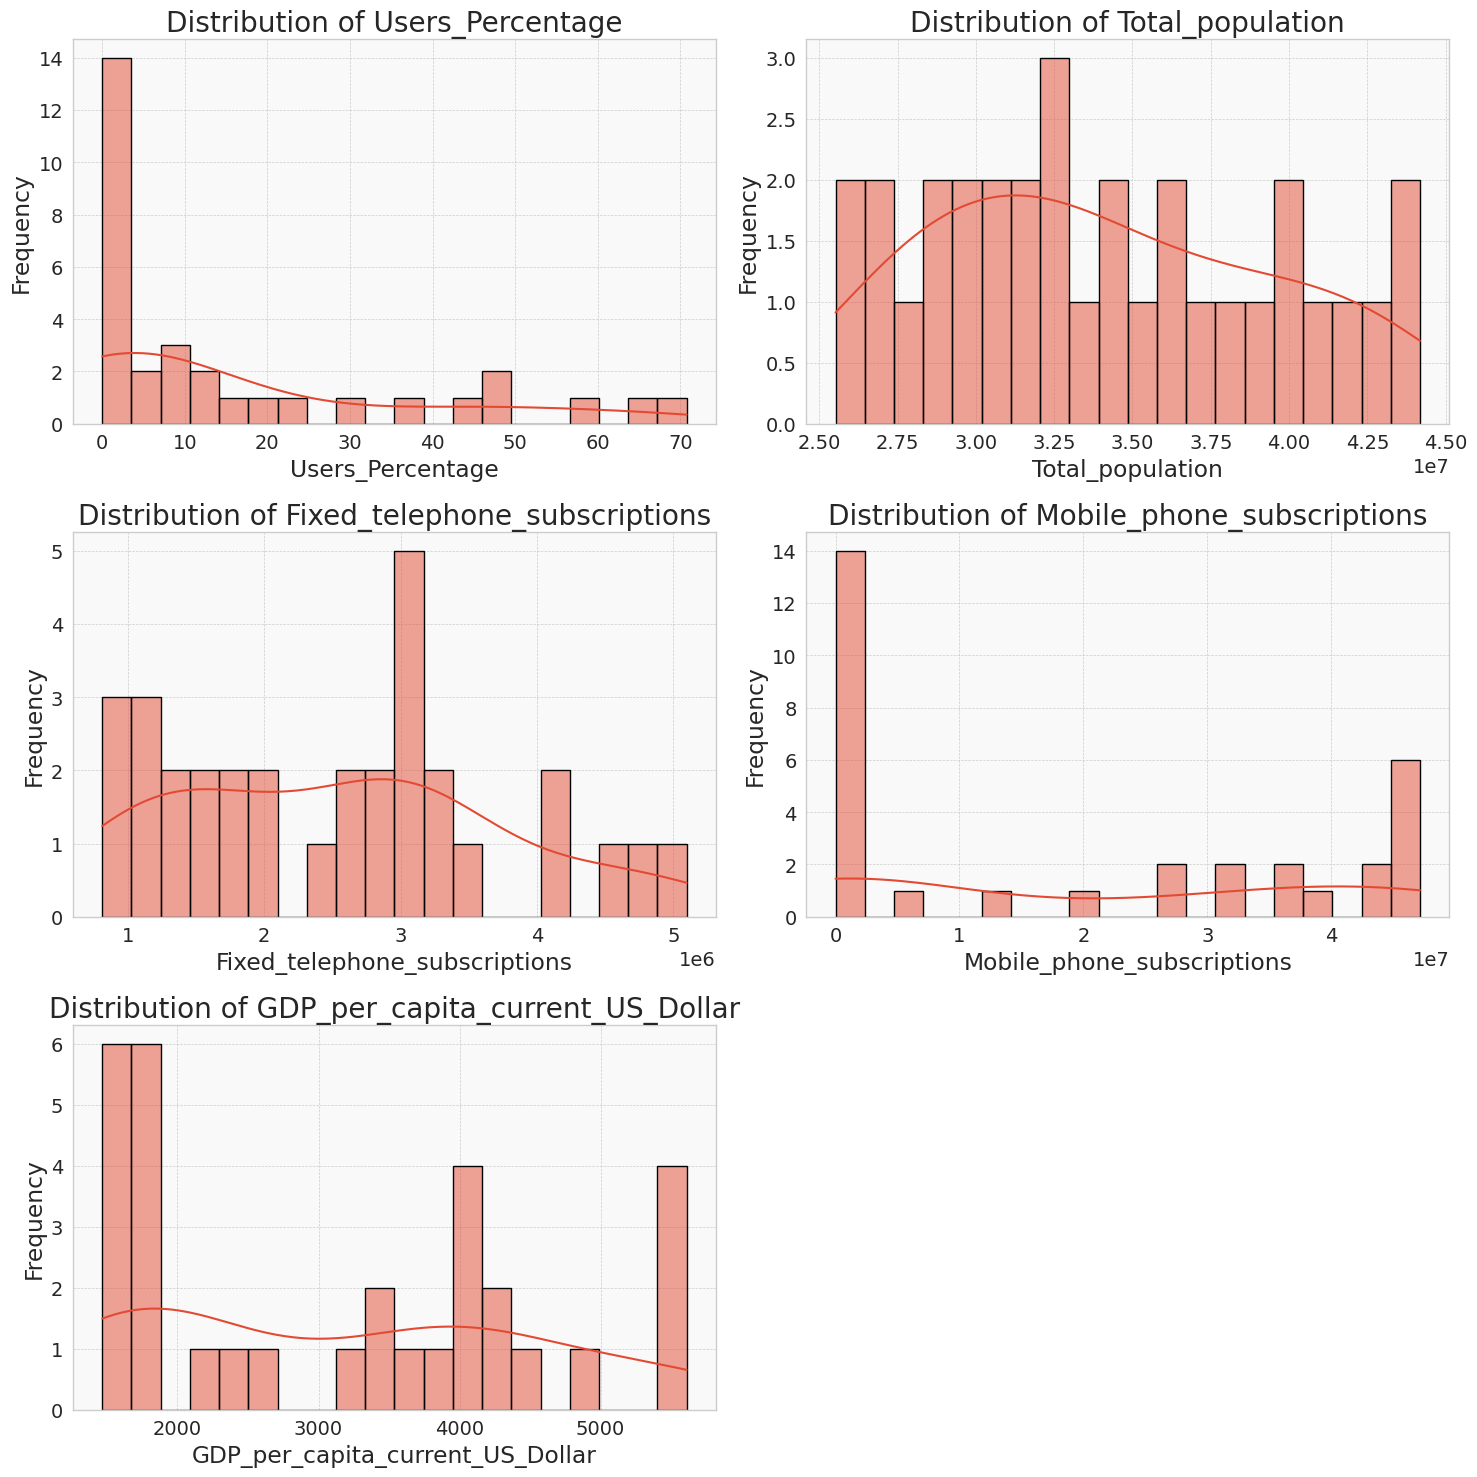

In [9]:
# Distribution Chart
def plot_numeric_distribution(df):
    # Define all numeric columns to plot
    numeric_columns = [
        'Users_Percentage', 'Total_population',
        'Fixed_telephone_subscriptions',
        'Mobile_phone_subscriptions',
        'GDP_per_capita_current_US_Dollar',
    ]
    
    # Adjust layout parameters
    background_color = '#f9f9f9'
    sns.set_style("whitegrid", {"axes.facecolor": background_color})
    
    num_plots = len(numeric_columns)
    num_rows = (num_plots + 1) // 2  # Adjust number of rows for subplot layout
    num_cols = 2  # Set number of columns for subplot layout
    
    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axs = axs.flatten()
    
    # Plot each numeric column
    for i, col in enumerate(numeric_columns):
        # Histogram with KDE plot
        p = sns.histplot(df[col], bins=20, kde=True, ax=axs[i], palette='magma', edgecolor='black', linewidth=1)
        p.set_title(f"Distribution of {col}")
        p.set_xlabel(col)
        p.set_ylabel("Frequency")
        p.grid(True, linestyle='--', linewidth=0.5)
    
    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.show()

# Usage example:
plot_numeric_distribution(df)

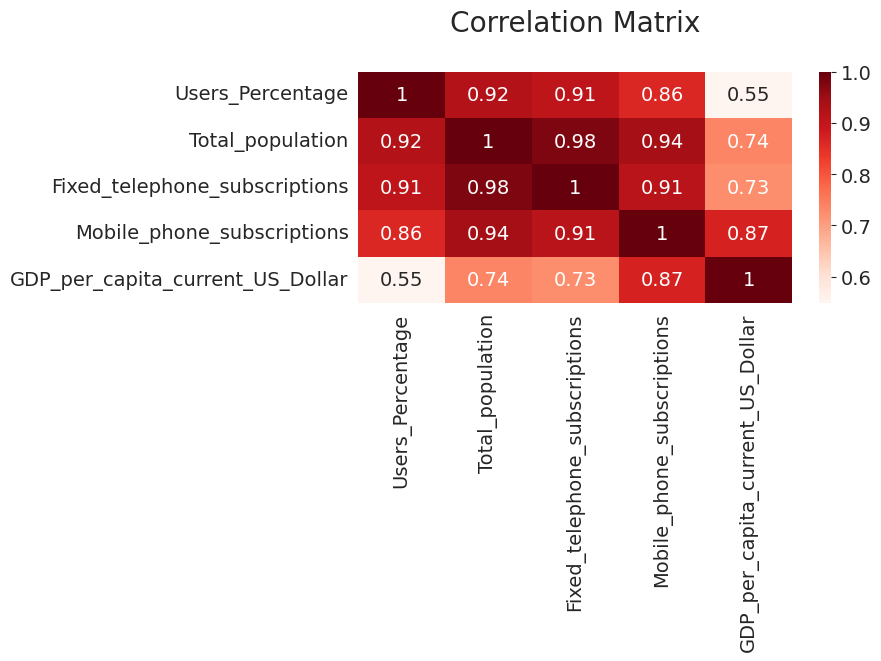

In [10]:
# Correlation Matrix
plt.figure(figsize=(7,3)) 
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix\n');

 -----
 #### Correlation Vlaues 
* `Users_Percentage` vs. `Total_population` is `0.92` it means a very strong Correlation.
* `Users_Percentage` vs.`Fixed_telephone_subscriptions` is `0.91` it means a very strong Correlation.
* `Users_Percentage` vs. `Mobile_phone_subscriptions` is `0.86` it means a strong Correlation.     
* `Users_Percentage` vs. `GDP_per_capita_current_US_Dollar` is `0.55` it means a weak Correlation.

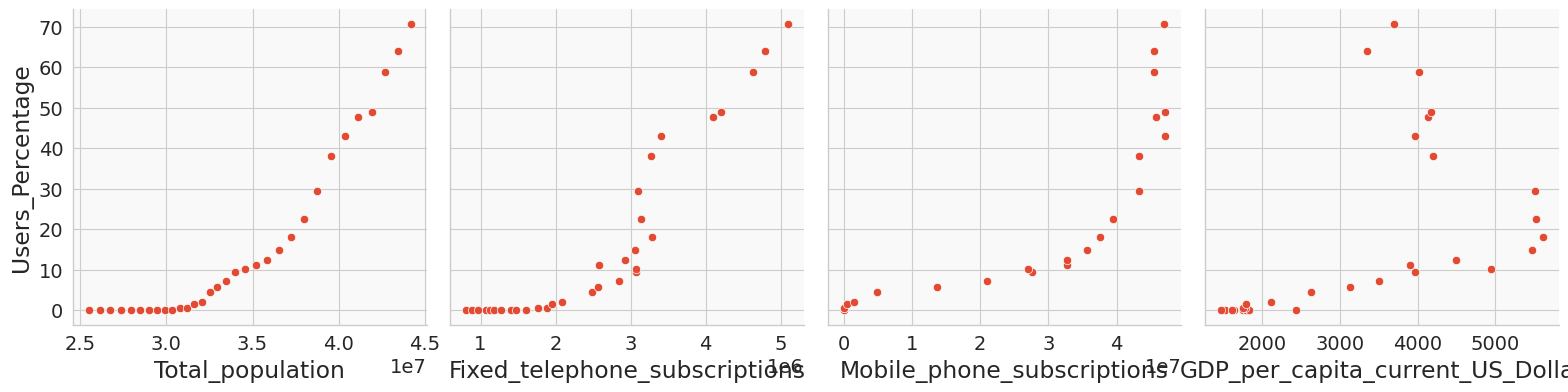

In [11]:
sns.pairplot(df, x_vars=['Total_population','Fixed_telephone_subscriptions', 'Mobile_phone_subscriptions', 
                         'GDP_per_capita_current_US_Dollar'],
             y_vars='Users_Percentage', height=4, aspect=1, kind='scatter')
plt.show()

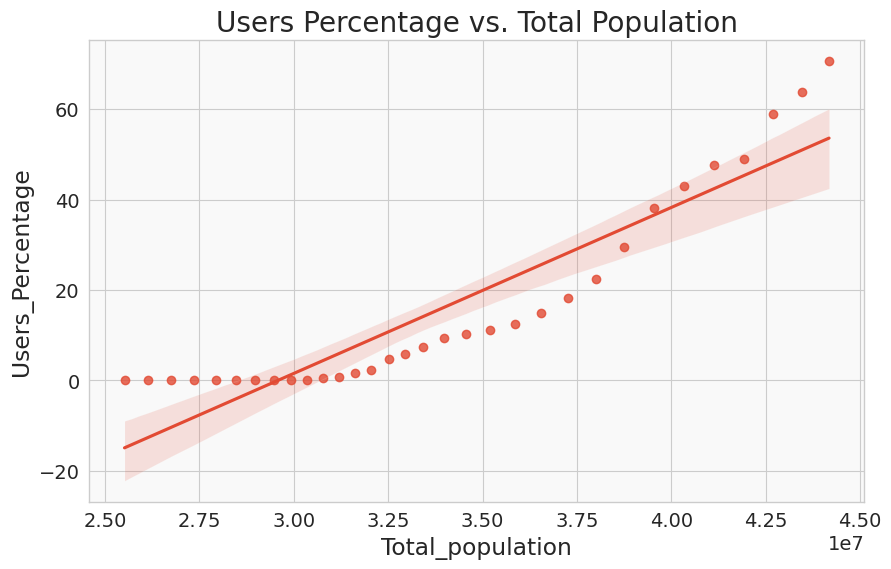

In [12]:
# Users Percentage vs. Total Population
plt.title("Users Percentage vs. Total Population")
sns.regplot(x=df.Total_population, y=df.Users_Percentage)
plt.show()

It seems a `very strong` positive correlation.

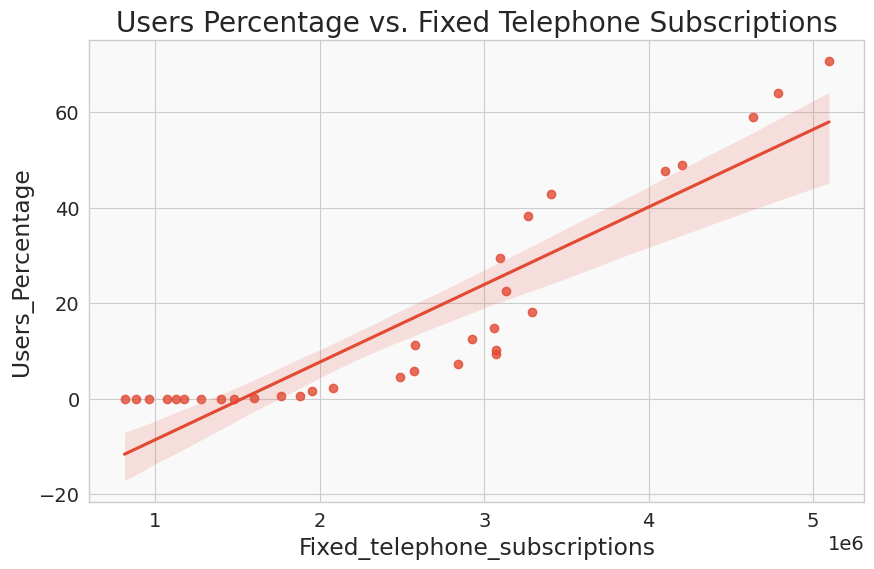

In [13]:
# Users Percentage vs. Fixed Telephone Subscriptions
plt.title("Users Percentage vs. Fixed Telephone Subscriptions")
sns.regplot(x=df.Fixed_telephone_subscriptions, y=df.Users_Percentage)
plt.show()

It seems a `very strong` positive correlation.

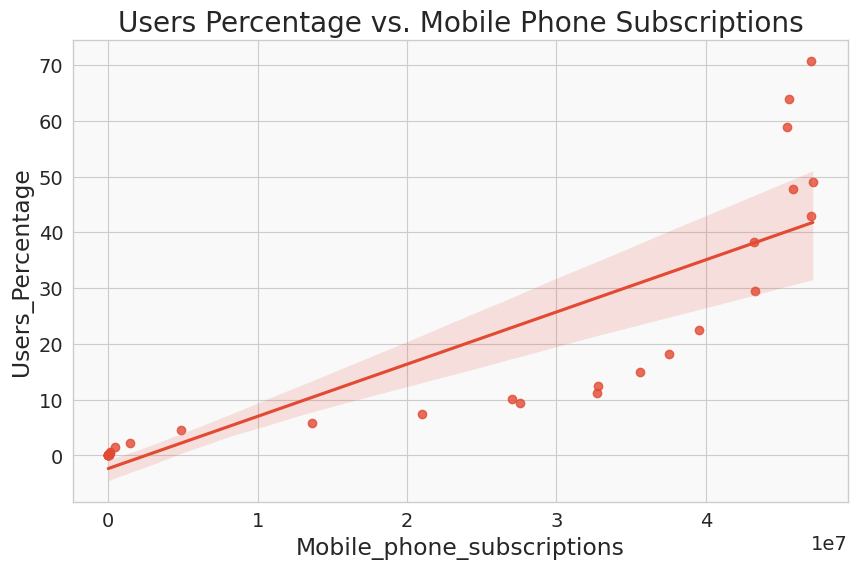

In [14]:
# Users Percentage vs. Mobile Phone Subscriptions
plt.title("Users Percentage vs. Mobile Phone Subscriptions")
sns.regplot(x=df.Mobile_phone_subscriptions, y=df.Users_Percentage)
plt.show()

It seems a `strong` positive correlation.

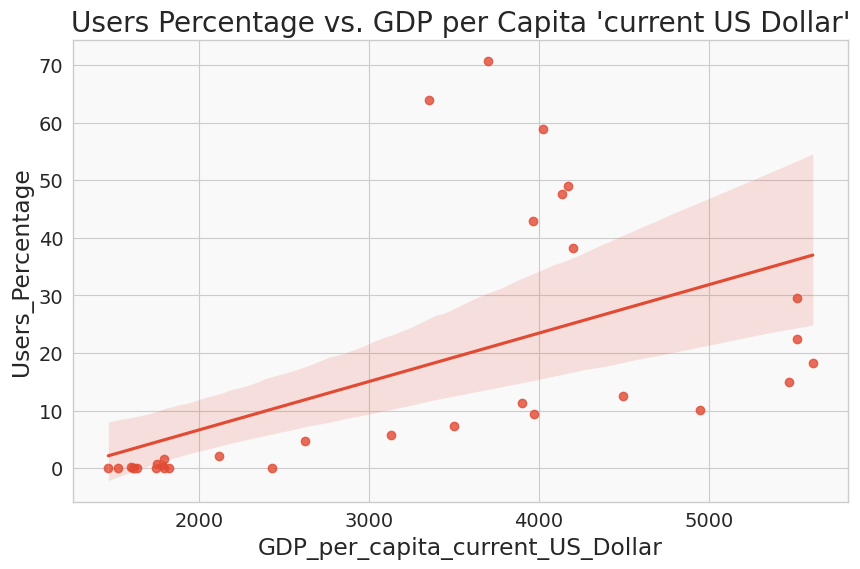

In [15]:
# Users Percentage vs. GDP per Capita 'current US Dollar'
plt.title("Users Percentage vs. GDP per Capita 'current US Dollar'")
sns.regplot(x=df.GDP_per_capita_current_US_Dollar, y=df.Users_Percentage)
plt.show()

It seems a `weak` correlation.

<a id='3'></a>
# <p style="width: 800px; border-radius: 12px; border: 3px dashed white; padding: 20px; background-color:#20b2aa; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: white; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;"> 📈 Multiple Linear Regression Analysis </p>


We will solve this multiple linear regression analysis problem in four steps:

1. **Model**

2. **Cost Function**

3. **Optimizer**

4. **Evaluation**

<a id='3.1'></a>
## <div style="text-align:center; border-radius:15px 15px; padding:8px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:lightcoral; overflow:hidden"><b>  Step 1 - Model </b></div>

We simply assume the following formula:

----------

$y = w_1 \times x_1 + w_2 \times x_2 + w_3 \times x_3 + w_4 \times x_4 + b$

----------

$y$ =  `Percentage of Internet users out of the total population in Algeria`, is the dependent variable.

$w_i$ : `Weight coefficient` The slope of the line (the coefficient for the independent variable), represent the change in the dependent variable for a one-unit change in the corresponding independent variable, holding all other variables constant.

$x_1$ = `Total Population`, an independent variable.

$x_2$ =  `Fixed Telephone subscriptions`, an independent variable.

$x_3$ = `Mobile Phone subscriptions`, an independent variable.

$x_4$ =  `GDP per capita in current US Dollar`, an independent variable.

$b$ = `y-intercept`, the intercept of the regression line with Y-axis, the expected mean value of the dependent variable when all independent variables are zero.

----------

In [16]:
# We will use the scikit-learn (sklearn) library and its packages to help us solve the model faster.
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

<a id='3.2'></a>
## <div style="text-align:center; border-radius:15px 15px; padding:8px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:lightcoral; overflow:hidden"><b> Step 2 - Cost Function </b></div>

We can compare our model's predictions with the actual targets.

The result is a single number, known as the **root mean squared error** (RMSE). The above description can be stated mathematically as follows: 

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Geometrically, the residuals can be visualized as follows:

<img src="https://i.imgur.com/ll3NL80.png" width="420">

Let's define a function to compute the RMSE.

In [17]:
# The root mean squared error (RMSE) Function.
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

<a id='3.3'></a>
## <div style="text-align:center; border-radius:15px 15px; padding:8px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:lightcoral; overflow:hidden"><b> Step 3 - Optimizer </b></div>

Next, we need a strategy to modify weights `w` and `b` to reduce the loss and improve the "fit" of the line to the data. To minimize the loss. 

![](https://miro.medium.com/max/1728/1*NO-YvpHHadk5lLxtg4Gfrw.gif)

In [18]:
# Create inputs and targets
input_cols = ['Total_population','Fixed_telephone_subscriptions', 'Mobile_phone_subscriptions',
              'GDP_per_capita_current_US_Dollar']
inputs, targets = df[input_cols], df['Users_Percentage']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 5.170317033669934


Loss value (RMSE) should be `0 or close to 0` | The best loss value here is `5.17`

In [19]:
# coefficient value
model.coef_

array([ 4.02445977e-07,  6.30056557e-06,  1.14112409e-06, -1.06949341e-02])

In [20]:
# intercept value
model.intercept_

-2.363325762578043

In [21]:
# weights values
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,Total_population,4.024460e-07
1,Fixed_telephone_subscriptions,6.300566e-06
2,Mobile_phone_subscriptions,1.141124e-06
3,GDP_per_capita_current_US_Dollar,-1.069493e-02
4,1,-2.363326e+00


- It seems that the | absolute value | of |`GDP_per_capita_current_US_Dollar`| has the highest weight. 
- The `Fixed_telephone_subscriptions` weight is higher than `Mobile_phone_subscriptions` 
- the `Total_population` weight is the lowest.

<a id='3.4'></a>
## <div style="text-align:center; border-radius:15px 15px; padding:8px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:lightcoral; overflow:hidden"><b> Step 4 - Evaluation </b></div>

* The proportion of individuals using the Internet - out of the total population - in Algeria is related to the following indicators: `GDP per capita (current US$)` then `Fixed phone subscriptions` and `Mobile phone subscriptions` then `Total population`

* It can be expressed by the following formula:

----------

$y = 4.02 \times 10^{-7} x_1 + 6.3 \times 10^{-6} x_2 + 1.14 \times 10^{-6} x_3 - 1.07 \times 10^{-2} x_4 - 2.36$

----------

$y$ =  `Predicted Percentage of Internet users out of the total population in Algeria`

$x_1$ = `Predicted Total Population`

$x_2$ =  `Predicted Fixed Telephone subscriptions`

$x_3$ = `Predicted Mobile Phone subscriptions`

$x_4$ =  `Predicted GDP per capita in current US Dollar`

$b = -2.36$ = `Predicted y-intercept`

----------


### <div style="text-align:center; border-radius:15px 15px; padding:8px; color:black; margin:0; font-size:100%; font-family:Pacifico; background-color:lime; overflow:hidden"><b> ✅ Conclusion </b></div>

Using multiple linear regression analysis we were able to solve the problem. The proportion of individuals using the Internet - out of the total population - in Algeria is related to the following indicators in order:

1. GDP per capita (current US dollars)
2. Fixed telephone subscriptions
3. Mobile telephone subscriptions
4. Total population

### <div style="text-align:center; border-radius:15px 15px; padding:8px; color:black; margin:0; font-size:100%; font-family:Pacifico; background-color:yellow; overflow:hidden"><b> 🟢 Thank you for exploring my work  🌻 </b></div>

### 📚 References:
- https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms

If you find it helpful, please consider upvoting it ✨ Your support is greatly appreciated!